### Loading and Understanding the Dataset

In [4]:
# import
import tensorflow as tf
import tensorflow_datasets as tfds

# Load the Fashion MNIST dataset
(train_data, test_data), ds_info = tfds.load(
    'fashion_mnist',  # Dataset name
    split=['train', 'test'],  # We need training and test splits
    shuffle_files=True,  # Shuffle the dataset to ensure randomness
    as_supervised=True,  # Returns data in the form of (image, label) pairs
    with_info=True  # Load dataset metadata like feature names
)

# Print some basic information
print(f"Number of training samples: {len(train_data)}")
print(f"Number of test samples: {len(test_data)}")

Number of training samples: 60000
Number of test samples: 10000


### Visualizing the Data

2025-01-22 12:40:11.313501: W tensorflow/core/kernels/data/cache_dataset_ops.cc:914] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2025-01-22 12:40:11.316245: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


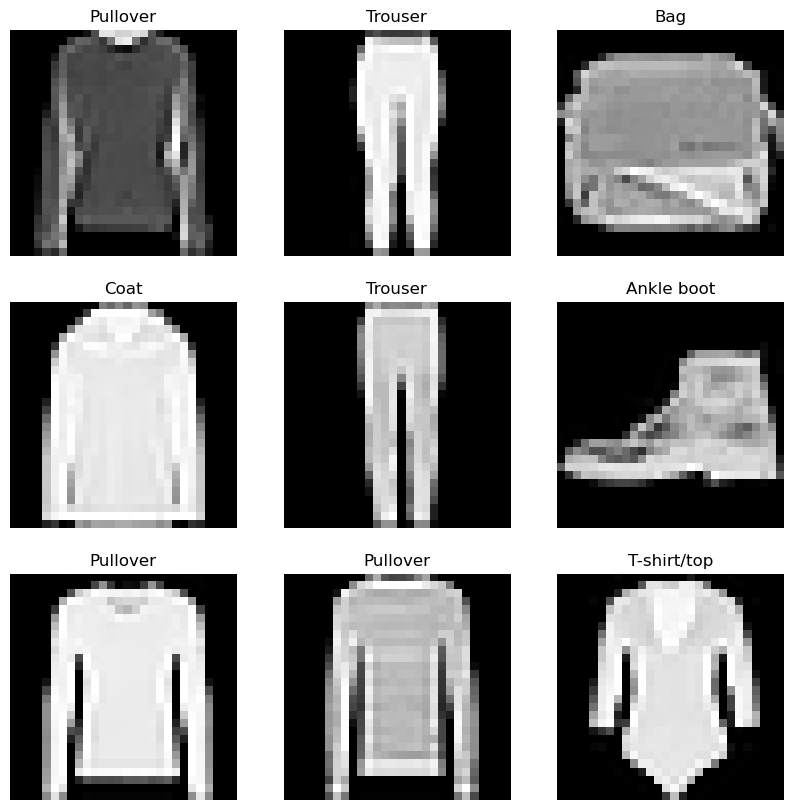

In [5]:
import matplotlib.pyplot as plt

# Prepare a mapping for class labels
class_names = ds_info.features['label'].names

# Function to plot 9 sample images from the training data
def visualize_data(dataset):
    plt.figure(figsize=(10, 10))
    for i, (image, label) in enumerate(dataset.take(9)):  # Take 9 examples
        image = image.numpy().reshape(28, 28)  # Reshape the image for display
        plt.subplot(3, 3, i+1) # building a grid to display images
        plt.imshow(image, cmap='gray') # showing images
        plt.title(class_names[label.numpy()]) # setting a title
        plt.axis('off')
    plt.show()

# Visualize the training data by calling the function
visualize_data(train_data)

### Preprocessing the Data

Normalization: 
In image processing is a process that changes the range of pixel intensity values. Neural networks perform better when the input data is normalized (for instance, scaled down to a range between 0 and 1)

In [6]:
# Normalize images to [0, 1] range
def normalize_img(image, label):
    image = tf.cast(image, tf.float32) / 255.0  # Scale the pixel values
    return image, label

# Apply normalization to both train and test sets
train_data = train_data.map(normalize_img)
test_data = test_data.map(normalize_img)

We scaled the pixel values from their original range (0 to 255) down to [0, 1]. We did this by creating a function called normalize_img and then applied this function via mapping to both training and testing portions of data.

### Building a Basic Neural Network
Now that our data is ready, let’s build a basic neural network using TensorFlow & Keras. This network will have:
* An input layer to accept the 28x28 pixel grayscale images
* A flattening layer to convert the 2D image into a 1D vector, so it can be inputted into a neural net. (capa de aplanamiento)
* One hidden (dense) layer to learn patterns in the data
* An output layer with 10 neurons (one for each class)
The very last two layers (the output layer and the hidden layers) have activation in it. Let’s now stop here and discuss what activation functions are for and what we need to use for our case

### Activation functions
are an integral building block of neural networks that enable them to learn complex patterns in data. They transform the input signal of a node in a neural network into an output signal that is then passed on to the next layer.

### Funciones de activación
son un componente integral de redes neuronales que les permiten aprender patrones complejos en los datos. Transforman la señal de entrada de un nodo en una red neuronal en una señal de salida que luego se pasa a la siguiente capa.

![Screenshot 2025-01-22 at 12.44.50.png](<attachment:Screenshot 2025-01-22 at 12.44.50.png>)
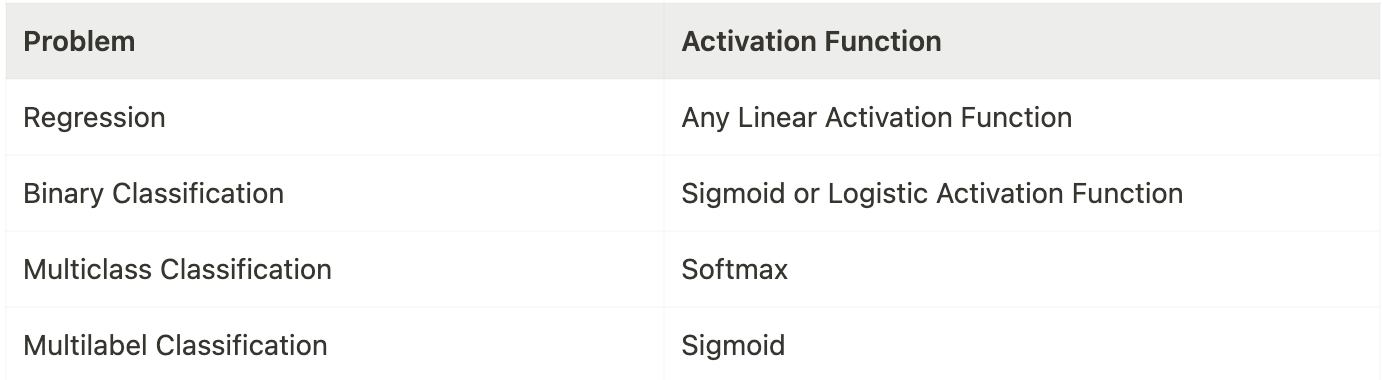

Our problem is a multiclass classification problem, that is why we are going to use Softmax! Here is the complete code that builds our neural net:

In [7]:
from tensorflow.keras import layers, models

# Build the neural network model
model = models.Sequential([
		# Flatten 28x28 images into 1D vectors
    layers.Flatten(input_shape=(28, 28)),
    # First fully connected layer with 128 neurons
    layers.Dense(128, activation='relu'),
    # Output layer with 10 neurons (one per class)  
    layers.Dense(10, activation='softmax')  
])

# Compile the model
model.compile(
    optimizer='adam',  # Optimization algorithm
    loss='sparse_categorical_crossentropy',  # Loss function for multi-class classification
    metrics=['accuracy']  # Track accuracy during training
)

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Training the Model

In [8]:
# Batch the data for better performance during training
train_data = train_data.batch(32)
test_data = test_data.batch(32)

# Train the model for 10 epochs
history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=10  # Train for 10 passes through the dataset
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7815 - loss: 0.6315 - val_accuracy: 0.8397 - val_loss: 0.4466
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8622 - loss: 0.3843 - val_accuracy: 0.8547 - val_loss: 0.4005
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8763 - loss: 0.3402 - val_accuracy: 0.8616 - val_loss: 0.3767
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8849 - loss: 0.3139 - val_accuracy: 0.8684 - val_loss: 0.3656
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8928 - loss: 0.2936 - val_accuracy: 0.8725 - val_loss: 0.3585
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8978 - loss: 0.2783 - val_accuracy: 0.8741 - val_loss: 0.3525
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9035 - loss: 0.2660 - val_accuracy: 0.8778 - val_loss: 0.3527
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9066 - loss: 0.2557 - 

### Batching
 We divide the data into smaller batches to make training more efficient. Here, each batch contains 32 images. We’ll input data to the model by batches: first - the first batch, then the second one and so on and so forth till we end with no batches (or no data to feed).
There will be 1875 batches in total for our data. We calculated this number by dividing the total number of images (60k) by the batch size (32)

### Evaluating the Model

After training, we can evaluate how well our model performs on the test set. This helps us understand whether the model generalizes well to unseen data.

In [9]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step - accuracy: 0.8843 - loss: 0.3485
Test accuracy: 88.18%


Explanation:
evaluate: This function computes the loss and accuracy on the test dataset. The accuracy shows how well our model performs on unseen images.